In [3]:
#importing the necessary python libraries
import pandas as pd
import sqlite3
import os
from sqlalchemy import create_engine

#connecting to a local database
conn = sqlite3.connect('retail_database')
c = conn.cursor()

#creating a table in the retail_database
c.execute('''CREATE TABLE IF NOT EXISTS companies (
    Rank INT,
    `Name of Company` TEXT,
    `Location` TEXT,
    `FY2021_retail_revenue` INT,
    `FY2021_parent_company/ group revenue` INT,
    `Dominant_operational_format` TEXT,
    `Geographies_of_operation` INT,
    `FY2016-2021_retail_revenueCAGR3` TEXT,
    `FY2020-2021_retail_revenue_growth` TEXT,
    `FY2021_Net_profit_margin` TEXT)
    ''')

conn.commit()

#loading the data from a csv file into a dataframe
df = pd.read_csv('/home/muregz/data_analysis/RetailAnalysis/leading_retailers_2021.csv', encoding='Windows-1252')

df.isna().sum()
 #if any null values drop or impute

df.dropna(inplace = True)
df

# Remove commas from string values in 'FY2021_retail_revenue' and 'FY2021_parent_company/ group revenue' column
df['FY2021_retail_revenue'] = df['FY2021_retail_revenue'].str.replace(',', '')
df['FY2021_parent_company/ group revenue'] = df['FY2021_parent_company/ group revenue'].str.replace(',', '')

# Convert column to integer type
df['FY2021_retail_revenue'] = df['FY2021_retail_revenue'].astype(int)
df['FY2021_parent_company/ group revenue'] = df['FY2021_parent_company/ group revenue'].astype(int)
df['Geographies_of_operation'] = df['Geographies_of_operation'].astype(int)

#loading the dataframe into the companies table in the retail_database
df.to_sql('companies', conn, if_exists='replace', index = False)

In [4]:
#configuring mysql into the jupyter notebook
%load_ext sql
%config SqlMagic.autopandas=True

In [6]:
#connecting the database

# Construct the connection URL
db_url = f"sqlite:///{os.path.abspath('/home/muregz/data_analysis/RetailAnalysis/retail_database')}"

# Set the DATABASE_URL environment variable
os.environ['DATABASE_URL'] = db_url

# Create a database engine
engine = create_engine(os.environ['DATABASE_URL'])

In [7]:
%%sql
--showing table information
SELECT * FROM companies LIMIT 10;

Done.


,Rank,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
0,1,Walmart Inc,United States,572754,572754,Hypermarket/ supercenter,24,3.30%,2.40%,2.40%
1,2,"Amazon.com, Inc.",United States,239150,469822,Non-store,21,20.40%,12.00%,7.10%
2,3,Costco Wholesale Corporation,United States,195929,195929,Cash & carry/ warehouse club,12,10.50%,17.50%,2.60%
3,5,"The Home Depot, Inc",United States,151157,151157,Home improvement,3,9.80%,14.40%,10.90%
4,6,The Kroger Co.,United States,136971,137888,Supermarket,1,3.50%,4.10%,1.20%
5,7,"JD.com, Inc",China,126387,147450,Non-store,1,28.00%,25.10%,-0.50%
6,8,"Walgreens Boots Alliance, Inc.",United States,122045,132509,Drug store/ pharmacy,6,4.70%,3.70%,1.90%
7,10,Target Corporation,United States,104611,106005,Discount department store,1,8.50%,13.20%,6.60%
8,12,"Lowe's Companies, Inc.",United States,96250,96250,Home improvement,2,8.20%,7.40%,8.80%
9,13,Ahold Delhaize,Netherlands,89381,89381,Supermarket,10,3.90%,1.20%,3.00%


In [21]:
%%sql
--showing which company has the most branches(Geographies of operations)
SELECT `Name of Company`,Location, MAX(Geographies_of_operation), `Dominant_operational_format`
FROM companies;

 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Name of Company,Location,MAX(Geographies_of_operation),Dominant_operational_format
0,"Inditex, S.A.",Spain,215,Apparel/ footwear specialty


In [20]:
%%sqlsqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
--showing the 10 best companies in terms of revenue growth
SELECT `Name of Company`, Location, `FY2020-2021_retail_revenue_growth`, `Dominant_operational_format`
FROM companies
ORDER BY `FY2020-2021_retail_revenue_growth` DESC
LIMIT 10;

 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Name of Company,Location,FY2020-2021_retail_revenue_growth,Dominant_operational_format
0,Shoprite Holdings Ltd.,South Africa,9.60%,Supermarket
1,"Best Buy Co., Inc.",United States,9.50%,Electronics specialty
2,"Advance Auto Parts, Inc.",United States,8.80%,Other specialty
3,"Canadian Tire Corporation, Limited",Canada,8.80%,Other specialty
4,Natura & Co Holding S.A,Brazil,8.80%,Other specialty
5,Salling Group,Denmark,8.70%,Discount store
6,Army and Air Force Exchange Service (AAFES),United States,8.70%,Convenience/ forecourt store
7,Lenta Group,Russia,8.60%,Hypermarket/ supercenter
8,"Jerónimo Martins, SGPS, S.A.",Portugal,8.30%,Discount stor
9,"BJ’s Wholesale Club Holdings, Inc.",United States,8.00%,Cash & carry/ warehouse club


In [19]:
%%sql
--showing the 10 best companies in terms of 2021 retail revenue
SELECT `Name of Company`, Location, `FY2021_retail_revenue`, `Dominant_operational_format`
FROM companies
ORDER BY `FY2021_retail_revenue` DESC
LIMIT 10;

 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Name of Company,Location,FY2021_retail_revenue,Dominant_operational_format
0,Walmart Inc,United States,572754,Hypermarket/ supercenter
1,"Amazon.com, Inc.",United States,239150,Non-store
2,Costco Wholesale Corporation,United States,195929,Cash & carry/ warehouse club
3,"The Home Depot, Inc",United States,151157,Home improvement
4,The Kroger Co.,United States,136971,Supermarket
5,"JD.com, Inc",China,126387,Non-store
6,"Walgreens Boots Alliance, Inc.",United States,122045,Drug store/ pharmacy
7,Target Corporation,United States,104611,Discount department store
8,"Lowe's Companies, Inc.",United States,96250,Home improvement
9,Ahold Delhaize,Netherlands,89381,Supermarket


In [18]:
%%sql
--showing the 10 best performing companies in terms of profit margins
SELECT `Name of Company`, Location, `FY2021_Net_profit_margin`, `Dominant_operational_format`
FROM companies
ORDER BY `FY2021_Net_profit_margin` DESC
LIMIT 10;

 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Name of Company,Location,FY2021_Net_profit_margin,Dominant_operational_format
0,"Academy Sports and Outdoors, Inc.",United States,9.90%,Other specialty
1,Signet Jewelers Limited,United States,9.80%,Other specialty
2,Victoria's Secret & Co.,United States,9.50%,Apparel/ footwear specialty
3,T. J. Morris dba Home Bargains,United Kingdom,9.50%,Other specialty
4,The Sherwin-Williams Company / Americas Group,United States,9.30%,Home improvement
5,"Publix Super Markets, Inc.",United States,9.10%,Supermarket
6,"Ross Stores, Inc.",United States,9.10%,Apparel/ footwear specialty
7,B&M European Value Retail S.A.,United Kingdom,9.00%,Discount store
8,"Lowe's Companies, Inc.",United States,8.80%,Home improvement
9,"El Puerto de Liverpool, S.A.B. de C.V.",Mexico,8.50%,Department store


In [24]:
%%sql
--showing companies that had the highest compound annual growth rate from 2016-2021
SELECT `Name of Company`, Location, `FY2016- 2021_retail_revenueCAGR3`, `Dominant_operational_format`
FROM companies
ORDER BY `FY2016- 2021_retail_revenueCAGR3` DESC
LIMIT 12;


 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Name of Company,Location,FY2016- 2021_retail_revenueCAGR3,Dominant_operational_format
0,Central Retail Corporation Public Company Limi...,Thailand,ne,Department store
1,Endeavour Group,Australia,n/a,Other specialty
2,"The Home Depot, Inc",United States,9.80%,Home improvement
3,Tsuruha Holdings Inc.,Japan,9.70%,Drug store/ pharmacy
4,"Nitori Holdings Co., Ltd.",Japan,9.60%,Other specialty
5,Lenta Group,Russia,9.60%,Hypermarket/ supercenter
6,Liquor Control Board of Ontario,Canada,9.50%,Other specialty
7,"Chyuan Lien Enterprise Co Ltd / PX Mart Co., L...",Taiwan (China),9.50%,Supermarket
8,Groupe Adeo SA,France,9.40%,Home improvement
9,"Yaoko Co., Ltd.",Japan,9.40%,Supermarket


In [25]:
%%sql
--showing the industries from the best performing retailers in 2021
SELECT DISTINCT Dominant_operational_format
FROM companies;

 * sqlite:////home/muregz/data_analysis/RetailAnalysis/retail_database
Done.


,Dominant_operational_format
0,Hypermarket/ supercenter
1,Non-store
2,Cash & carry/ warehouse club
3,Home improvement
4,Supermarket
5,Drug store/ pharmacy
6,Discount department store
7,Hypermarket/ supercenter
8,Convenience/ forecourt store
9,Hypermarket/ supercenter


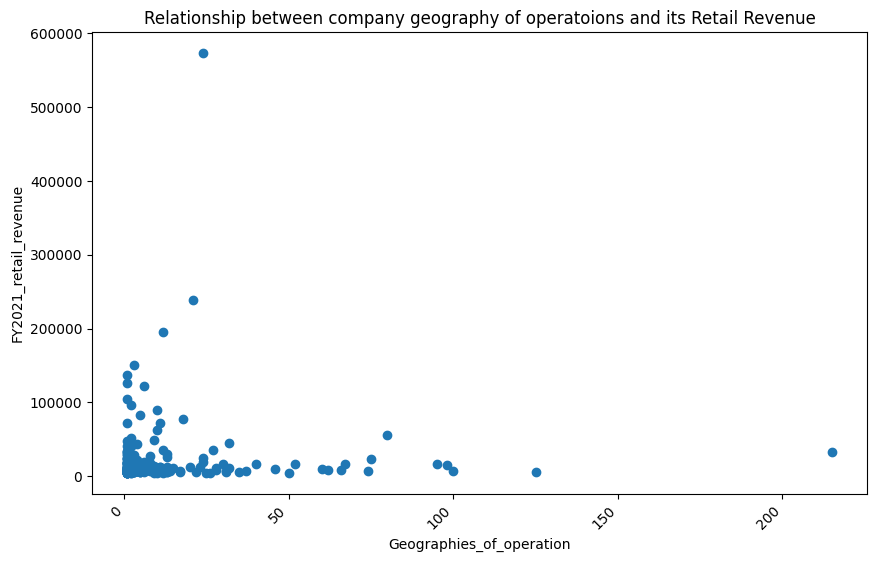

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Geographies_of_operation'], df['FY2021_retail_revenue'])

# Set the chart title and axis labels
ax.set_title('Relationship between company geography of operatoions and its Retail Revenue')
ax.set_xlabel('Geographies_of_operation')
ax.set_ylabel('FY2021_retail_revenue')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.show()